In [12]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.


In [90]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Excel file
file_path = '2007-2023-PIT-Counts-by-State.xlsb'

# Load data from individual year sheets
homelessness_data = {}
for year in range(2007, 2024):
    sheet_name = str(year)
    data = pd.read_excel(file_path, sheet_name=sheet_name, engine='pyxlsb')
    if 'Sheltered Total Homeless' in data.columns and 'Unsheltered Homeless' in data.columns:
        homelessness_data[year] = data[['State', 'Sheltered Total Homeless', 'Unsheltered Homeless']]




In [91]:
# Consolidate all yearly data into a single dataframe
consolidated_data = pd.DataFrame()
for year, data in homelessness_data.items():
    data['Year'] = year
    consolidated_data = pd.concat([consolidated_data, data], ignore_index=True)



In [92]:
# Clean the data
consolidated_data_clean = consolidated_data.dropna(subset=['State', 'Sheltered Total Homeless', 'Unsheltered Homeless'])
consolidated_data_clean = consolidated_data_clean[consolidated_data_clean['State'].apply(lambda x: len(x) == 2 and x.isupper())]
consolidated_data_clean['Sheltered Total Homeless'] = pd.to_numeric(consolidated_data_clean['Sheltered Total Homeless'], errors='coerce')
consolidated_data_clean['Unsheltered Homeless'] = pd.to_numeric(consolidated_data_clean['Unsheltered Homeless'], errors='coerce')
consolidated_data_clean.dropna(subset=['Sheltered Total Homeless', 'Unsheltered Homeless'], inplace=True)
consolidated_data_clean['Sheltered Total Homeless'] = consolidated_data_clean['Sheltered Total Homeless'].astype(int)
consolidated_data_clean['Unsheltered Homeless'] = consolidated_data_clean['Unsheltered Homeless'].astype(int)

# Calculate total homeless by summing sheltered and unsheltered
consolidated_data_clean['Total Homeless'] = consolidated_data_clean['Sheltered Total Homeless'] + consolidated_data_clean['Unsheltered Homeless']

In [93]:
# Create the base figure with initial data for "Sheltered Total Homeless"
fig = go.Figure()

# Add the "Sheltered Total Homeless" choropleth map
fig.add_trace(
    go.Choropleth(
        locations=consolidated_data_clean['State'],
        z=consolidated_data_clean['Sheltered Total Homeless'],
        locationmode='USA-states',
        colorscale='Plasma',
        colorbar_title="Sheltered Homeless",
        name="Sheltered"
    )
)

# Add the "Unsheltered Homeless" choropleth map
fig.add_trace(
    go.Choropleth(
        locations=consolidated_data_clean['State'],
        z=consolidated_data_clean['Unsheltered Homeless'],
        locationmode='USA-states',
        colorscale='Viridis',
        colorbar_title="Unsheltered Homeless",
        name="Unsheltered",
       # visible=False  # Initially hide this trace
    )
)

# Add the "Total Homeless" choropleth map
fig.add_trace(
    go.Choropleth(
        locations=consolidated_data_clean['State'],
        z=consolidated_data_clean['Total Homeless'],
        locationmode='USA-states',
        colorscale='Earth',  
        colorbar_title="Total Homeless",
        name="Total",
        visible=False  # Initially hide this trace
    )
)

# Update the layout to add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [True, False, False]},
                          {"title": "Sheltered Total Homeless"}],
                    label="Sheltered Homeless",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True, False]},
                          {"title": "Unsheltered Homeless"}],
                    label="Unsheltered Homeless",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, False, True]},
                          {"title": "Total Homeless"}],
                    label="Total Homeless",
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ],
    title_text="Homelessness in the USA: Sheltered vs. Unsheltered",
    geo=dict(
        scope='usa',
        bgcolor= 'rgba(0,0,0,0)'
    )
)

fig.show()

In [94]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# Load data from individual year sheets
homeless_data = {}
for year in range(2007, 2024):
    sheet_name = str(year)
    data = pd.read_excel(file_path, sheet_name=sheet_name, engine='pyxlsb')
    if 'Sheltered Total Homeless' in data.columns and 'Unsheltered Homeless' in data.columns:
        homelessness_data[year] = data[['State', 'Sheltered Total Homeless', 'Unsheltered Homeless']]

# Consolidate all yearly data into a single dataframe
consolidated_data = pd.DataFrame()
for year, data in homelessness_data.items():
    data['Year'] = year
    consolidated_data = pd.concat([consolidated_data, data], ignore_index=True)

# Clean the data
consolidated_data_clean = consolidated_data.dropna(subset=['State', 'Sheltered Total Homeless', 'Unsheltered Homeless'])
consolidated_data_clean = consolidated_data_clean[consolidated_data_clean['State'].apply(lambda x: len(x) == 2 and x.isupper())]
consolidated_data_clean['Sheltered Total Homeless'] = pd.to_numeric(consolidated_data_clean['Sheltered Total Homeless'], errors='coerce')
consolidated_data_clean['Unsheltered Homeless'] = pd.to_numeric(consolidated_data_clean['Unsheltered Homeless'], errors='coerce')
consolidated_data_clean.dropna(subset=['Sheltered Total Homeless', 'Unsheltered Homeless'], inplace=True)
consolidated_data_clean['Sheltered Total Homeless'] = consolidated_data_clean['Sheltered Total Homeless'].astype(int)
consolidated_data_clean['Unsheltered Homeless'] = consolidated_data_clean['Unsheltered Homeless'].astype(int)

# Calculate total homeless by summing sheltered and unsheltered
consolidated_data_clean['Total Homeless'] = consolidated_data_clean['Sheltered Total Homeless'] + consolidated_data_clean['Unsheltered Homeless']

# Create the base figure
fig = go.Figure()

# Add traces for each year
for year in consolidated_data_clean['Year'].unique():
    yearly_data = consolidated_data_clean[consolidated_data_clean['Year'] == year]
    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['State'],
            z=yearly_data['Sheltered Total Homeless'],
            locationmode='USA-states',
            colorscale='Plasma',
            name=f"Sheltered {year}",
            text=yearly_data.apply(lambda row: f"Year: {year}<br>State: {row['State']}<br>Sheltered: {row['Sheltered Total Homeless']}<br>Unsheltered: {row['Unsheltered Homeless']}<br>Total: {row['Total Homeless']}", axis=1),
            hoverinfo='text',
            visible=False
        )
    )
    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['State'],
            z=yearly_data['Unsheltered Homeless'],
            locationmode='USA-states',
            colorscale='Viridis',
            name=f"Unsheltered {year}",
            text=yearly_data.apply(lambda row: f"Year: {year}<br>State: {row['State']}<br>Sheltered: {row['Sheltered Total Homeless']}<br>Unsheltered: {row['Unsheltered Homeless']}<br>Total: {row['Total Homeless']}", axis=1),
            hoverinfo='text',
            visible=False
        )
    )
    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['State'],
            z=yearly_data['Total Homeless'],
            locationmode='USA-states',
            colorscale='Portland',
            name=f"Total {year}",
            text=yearly_data.apply(lambda row: f"Year: {year}<br>State: {row['State']}<br>Sheltered: {row['Sheltered Total Homeless']}<br>Unsheltered: {row['Unsheltered Homeless']}<br>Total: {row['Total Homeless']}", axis=1),
            hoverinfo='text',
            visible=False
        )
    )

# Create initial visibility settings for the traces
initial_visible = [True] + [False] * (len(fig.data) - 1)

# Create steps for the slider
steps = []
for i, year in enumerate(consolidated_data_clean['Year'].unique()):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Unhoused people in {year}"}],
        label=str(year)
    )
    step["args"][0]["visible"][i * 3] = True
    steps.append(step)

# Create buttons for the dropdown menu
buttons_type = [
    dict(
        label="Sheltered Unhoused People",
        method="update",
        args=[{"visible": initial_visible, "colorscale": ['Plasma']}, {"title": "Sheltered Unhoused People"}]
    ),
    dict(
        label="Unsheltered Unhoused People",
        method="update",
        args=[{"visible": [initial_visible[0] and False, True] + [False] * (len(fig.data) - 2), "colorscale": ['Viridis']}, {"title": "Unsheltered Unhoused People"}]
    ),
    dict(
        label="Total Unhoused People",
        method="update",
        args=[{"visible": [initial_visible[0] and False, False, True] + [False] * (len(fig.data) - 3), "colorscale": ['Portland']}, {"title": "Total Unhoused People"}]
    )
]

# Update layout with the slider and dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons_type,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.25,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": steps
    }],
    title_text="Unhoused People in the USA: Sheltered vs. Unsheltered",
    geo=dict(
        scope='usa',
        bgcolor='rgba(0,0,0,0)'
    )
)

fig.show()




In [95]:
import plotly.offline as pyo

# Create and configure your figure
# fig = go.Figure()

pyo.plot(fig, filename='temp-plot.html', auto_open=True)


'temp-plot.html'

In [96]:
consolidated_data.dtypes

State                       object
Sheltered Total Homeless    object
Unsheltered Homeless        object
Year                         int64
dtype: object

In [100]:
consolidated_data['Sheltered Unhoused'] = pd.to_numeric(consolidated_data['Sheltered Total Homeless'], errors='coerce')
consolidated_data['Unsheltered Unhoused'] = pd.to_numeric(consolidated_data['Unsheltered Homeless'], errors='coerce')
# Calculate total homeless by summing sheltered and unsheltered
consolidated_data['Total Unhoused'] =  pd.to_numeric((consolidated_data['Sheltered Total Homeless'] + consolidated_data_clean['Unsheltered Homeless']), errors='coerce')

# Determine the earliest and latest years in the dataset for each state
yearly_data = consolidated_data.groupby(['State', 'Year']).sum()

# Calculate the change in each type of homelessness count from the first to the last year recorded for each state
change_in_homelessness = yearly_data.groupby('State').apply(lambda x: x.iloc[-1] - x.iloc[0])

# Sort states by the change in Total Homeless, from highest increase to highest decrease
sorted_states = change_in_homelessness.sort_values(by='Total Unhoused', ascending=False)

sorted_states.reset_index(inplace=True)
sorted_states[['State', 'Sheltered Unhoused', 'Unsheltered Unhoused', 'Total Unhoused']]


,State,Sheltered Unhoused,Unsheltered Unhoused,Total Unhoused
0,CA,9465.0,32948.0,42413.0
1,NY,40912.0,-313.0,40599.0
2,WA,-2774.0,7431.0,4657.0
3,MA,4066.0,-52.0,4014.0
4,OR,-1191.0,3743.0,2552.0
5,VT,2438.0,-178.0,2260.0
6,ME,1383.0,237.0,1620.0
7,MN,839.0,231.0,1070.0
8,MT,827.0,201.0,1028.0
9,AK,759.0,213.0,972.0


In [102]:
# Grouping the data by 'Year' and summing the 'Total Homeless' column
total_homeless_per_year = consolidated_data.groupby('Year')['Total Homeless'].sum().reset_index()
total_homeless_per_year


,Year,Total Homeless
0,2007,647258.0
1,2008,639784.0
2,2009,630227.0
3,2010,637077.0
4,2011,623788.0
5,2012,621553.0
6,2013,590364.0
7,2014,576450.0
8,2015,564708.0
9,2016,549928.0


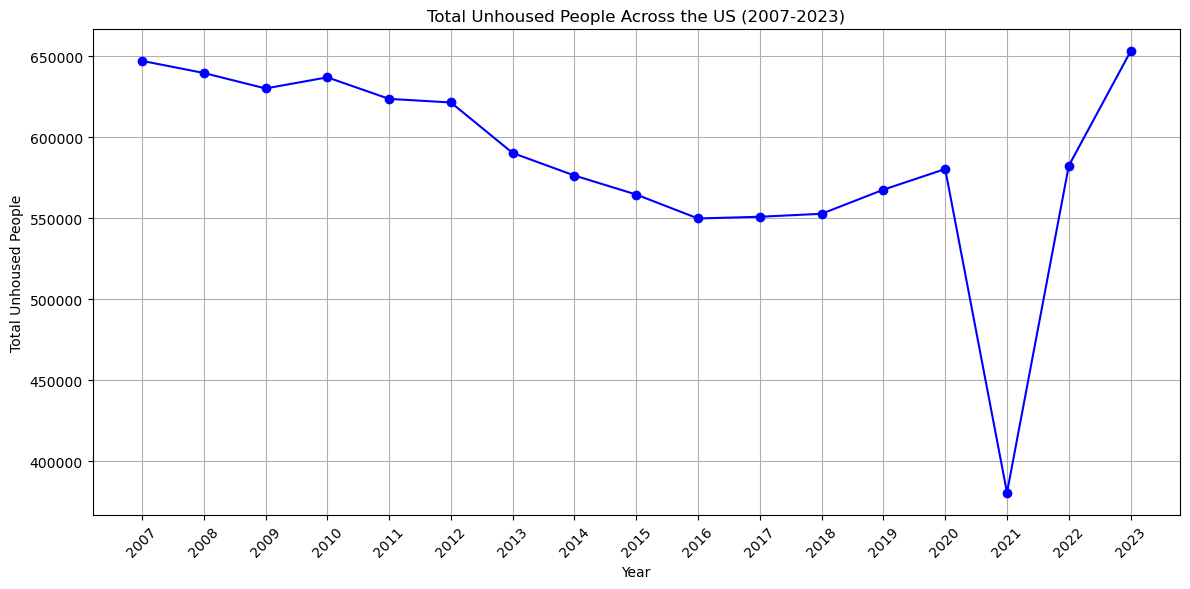

In [104]:
import matplotlib.pyplot as plt

# Create a line graph to visualize the total number of homeless over the years
plt.figure(figsize=(12, 6))
plt.plot(total_homeless_per_year['Year'], total_homeless_per_year['Total Homeless'], marker='o', linestyle='-', color='b')
plt.title('Total Unhoused People Across the US (2007-2023)')
plt.xlabel('Year')
plt.ylabel('Total Unhoused People')
plt.grid(True)
plt.xticks(total_homeless_per_year['Year'], rotation=45)
plt.tight_layout()
plt.show()


### population estimates from 2007-2023 - census data

In [24]:
import requests
import pandas as pd

In [110]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [112]:
from dotenv import load_dotenv
# Load environment variables
load_dotenv()

import os

# Your Census API key
api_key = os.getenv("api_key")


In [113]:
def fetch_census_data(year):
    """
    Fetch data from the Census API for a given year and return as a DataFrame.
    """
    url = f"https://api.census.gov/data/{year}/acs/acs1?get=NAME,group(B01003)&for=state:*&key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        return df
    else:
        raise ValueError(f"Failed to fetch data for year {year}: Status {response.status_code}")

# Specify the range of years you want to fetch data for, excluding 2020
years = [year for year in range(2007, 2023) if year != 2020]  # From 2007 to 2023, excluding 2020

# Dictionary to hold the data for each year
data_frames = {}

for year in years:
    try:
        data_frames[year] = fetch_census_data(year)
        print(f"Data for {year} fetched successfully.")
        data_frames[year].to_csv(f'census_data_{year}.csv', index=False)
    except Exception as e:
        print(str(e))
        



Data for 2007 fetched successfully.
Data for 2008 fetched successfully.
Data for 2009 fetched successfully.
Data for 2010 fetched successfully.
Data for 2011 fetched successfully.
Data for 2012 fetched successfully.
Data for 2013 fetched successfully.
Data for 2014 fetched successfully.
Data for 2015 fetched successfully.
Data for 2016 fetched successfully.
Data for 2017 fetched successfully.
Data for 2018 fetched successfully.
Data for 2019 fetched successfully.
Data for 2021 fetched successfully.
Data for 2022 fetched successfully.


In [26]:
# Print the data frames
for year, df in data_frames.items():
    print(f"\nData for the year {year}:")
    print(df)


Data for the year 2007:
                    NAME B01003_001E B01003_001EA B01003_001M B01003_001MA  \
0                Alabama     4627851         None           0        *****   
1                 Alaska      683478         None           0        *****   
2                Arizona     6338755         None           0        *****   
3               Arkansas     2834797         None           0        *****   
4             California    36553215         None           0        *****   
5               Colorado     4861515         None           0        *****   
6            Connecticut     3502309         None           0        *****   
7               Delaware      864764         None           0        *****   
8   District of Columbia      588292         None           0        *****   
9                Florida    18251243         None           0        *****   
10               Georgia     9544750         None           0        *****   
11                Hawaii     1283388   

In [27]:

# Load the census data files and rename 'NAME' to 'State' immediately
census_2007 = pd.read_csv('census_data_2007.csv').rename(columns={'NAME': 'State'})
census_2008 = pd.read_csv('census_data_2008.csv').rename(columns={'NAME': 'State'})
census_2009 = pd.read_csv('census_data_2009.csv').rename(columns={'NAME': 'State'})
census_2010 = pd.read_csv('census_data_2010.csv').rename(columns={'NAME': 'State'})
census_2011 = pd.read_csv('census_data_2011.csv').rename(columns={'NAME': 'State'})
census_2012 = pd.read_csv('census_data_2012.csv').rename(columns={'NAME': 'State'})
census_2013 = pd.read_csv('census_data_2013.csv').rename(columns={'NAME': 'State'})
census_2014 = pd.read_csv('census_data_2014.csv').rename(columns={'NAME': 'State'})
census_2015 = pd.read_csv('census_data_2015.csv').rename(columns={'NAME': 'State'})
census_2016 = pd.read_csv('census_data_2016.csv').rename(columns={'NAME': 'State'})
census_2017 = pd.read_csv('census_data_2017.csv').rename(columns={'NAME': 'State'})
census_2018 = pd.read_csv('census_data_2018.csv').rename(columns={'NAME': 'State'})
census_2019 = pd.read_csv('census_data_2019.csv').rename(columns={'NAME': 'State'})
census_2021 = pd.read_csv('census_data_2021.csv').rename(columns={'NAME': 'State'})
census_2022 = pd.read_csv('census_data_2022.csv').rename(columns={'NAME': 'State'})



# Merge the dataframes based on 'State' column and rename 'B01003_001E' with year suffix
census_data = census_2007[['State', 'B01003_001E']].rename(columns={'B01003_001E': 'pop_2007'})
dataframes = [census_2008, census_2009, census_2010, census_2011, census_2012, census_2013,
              census_2014, census_2015, census_2016, census_2017, census_2018, census_2019,
              census_2021, census_2022]

years = [year for year in range(2008, 2023) if year != 2020]

for year, df in zip(years, dataframes):
    df = df[['State', 'B01003_001E']].rename(columns={'B01003_001E': f'pop_{year}'})
    census_data = census_data.merge(df, on='State', how='outer')

census_data.head()



,State,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,pop_2021,pop_2022
0,Alabama,4627851,4661900,4708708,4785298,4802740,4822023,4833722,4849377,4858979,4863300,4874747,4887871,4903185,5039877,5074296
1,Alaska,683478,686293,698473,713985,722718,731449,735132,736732,738432,741894,739795,737438,731545,732673,733583
2,Arizona,6338755,6500180,6595778,6413737,6482505,6553255,6626624,6731484,6828065,6931071,7016270,7171646,7278717,7276316,7359197
3,Arkansas,2834797,2855390,2889450,2921606,2937979,2949131,2959373,2966369,2978204,2988248,3004279,3013825,3017804,3025891,3045637
4,California,36553215,36756666,36961664,37349363,37691912,38041430,38332521,38802500,39144818,39250017,39536653,39557045,39512223,39237836,39029342


In [28]:
# 2020 pop figures

In [29]:
# Construct the API query for the 2020 Census state population data
url = "https://api.census.gov/data/2020/dec/pl?get=P1_001N,NAME&for=state:*"

# Send the request
response = requests.get(url)

# Load data into a DataFrame
data_2020 = pd.DataFrame(response.json()[1:], columns=response.json()[0])
data_2020.rename(columns={'NAME': 'State', 'P1_001N': 'pop_2020'}, inplace=True)

# Merge the CSV data with the API data
census_data = census_data.merge(data_2020[['State', 'pop_2020']], on='State', how='outer')

# Display the first few rows of the merged data
census_data.head()

,State,pop_2007,pop_2008,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,pop_2021,pop_2022,pop_2020
0,Alabama,4627851,4661900,4708708,4785298,4802740,4822023,4833722,4849377,4858979,4863300,4874747,4887871,4903185,5039877,5074296,5024279
1,Alaska,683478,686293,698473,713985,722718,731449,735132,736732,738432,741894,739795,737438,731545,732673,733583,733391
2,Arizona,6338755,6500180,6595778,6413737,6482505,6553255,6626624,6731484,6828065,6931071,7016270,7171646,7278717,7276316,7359197,7151502
3,Arkansas,2834797,2855390,2889450,2921606,2937979,2949131,2959373,2966369,2978204,2988248,3004279,3013825,3017804,3025891,3045637,3011524
4,California,36553215,36756666,36961664,37349363,37691912,38041430,38332521,38802500,39144818,39250017,39536653,39557045,39512223,39237836,39029342,39538223


In [30]:
# 2023 pop estimates
# https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html



In [31]:


# Load the data from the provided Excel file, targeting the range that includes rows 10 to 61 and columns A and F
file_path = 'NST-EST2023-POP.xlsx'
data_2023 = pd.read_excel(file_path, usecols="A,F", skiprows=range(1, 9), nrows=52)

# Rename columns as specified
data_2023.columns = ['State', 'pop_2023']

# Remove the period from the beginning of each state name
data_2023['State'] = data_2023['State'].str.replace(r'^\.', '', regex=True)

# You can print out the data to make sure it's correct
print(data_2023.head())



        State  pop_2023
0     Alabama   5108468
1      Alaska    733406
2     Arizona   7431344
3    Arkansas   3067732
4  California  38965193


In [32]:
# Merge this data with the existing 'census_data' DataFrame
census_data = census_data.merge(data_2023, on='State', how='outer')

# Now, 'census_data' includes the 'pop_2023' column. Here's the head of the DataFrame to confirm
print(census_data.head())


        State  pop_2007  pop_2008  pop_2009  pop_2010  pop_2011  pop_2012  \
0     Alabama   4627851   4661900   4708708   4785298   4802740   4822023   
1      Alaska    683478    686293    698473    713985    722718    731449   
2     Arizona   6338755   6500180   6595778   6413737   6482505   6553255   
3    Arkansas   2834797   2855390   2889450   2921606   2937979   2949131   
4  California  36553215  36756666  36961664  37349363  37691912  38041430   

   pop_2013  pop_2014  pop_2015  pop_2016  pop_2017  pop_2018  pop_2019  \
0   4833722   4849377   4858979   4863300   4874747   4887871   4903185   
1    735132    736732    738432    741894    739795    737438    731545   
2   6626624   6731484   6828065   6931071   7016270   7171646   7278717   
3   2959373   2966369   2978204   2988248   3004279   3013825   3017804   
4  38332521  38802500  39144818  39250017  39536653  39557045  39512223   

   pop_2021  pop_2022  pop_2020  pop_2023  
0   5039877   5074296   5024279   5108468 

In [108]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Excel file
file_path = '2007-2023-PIT-Counts-by-State.xlsb'

# Load data from individual year sheets
homelessness_data = {}
for year in range(2007, 2024):
    sheet_name = str(year)
    data = pd.read_excel(file_path, sheet_name=sheet_name, engine='pyxlsb')
    if 'Sheltered Total Homeless' in data.columns and 'Unsheltered Homeless' in data.columns:
        homelessness_data[year] = data[['State', 'Sheltered Total Homeless', 'Unsheltered Homeless']]

# Consolidate all yearly data into a single dataframe
consolidated_data = pd.DataFrame()
for year, data in homelessness_data.items():
    data['Year'] = year
    consolidated_data = pd.concat([consolidated_data, data], ignore_index=True)

# Clean the data
consolidated_data_clean = consolidated_data.dropna(subset=['State', 'Sheltered Total Homeless', 'Unsheltered Homeless'])
consolidated_data_clean = consolidated_data_clean[consolidated_data_clean['State'].apply(lambda x: len(x) == 2 and x.isupper())]
consolidated_data_clean['Sheltered Total Homeless'] = pd.to_numeric(consolidated_data_clean['Sheltered Total Homeless'], errors='coerce')
consolidated_data_clean['Unsheltered Homeless'] = pd.to_numeric(consolidated_data_clean['Unsheltered Homeless'], errors='coerce')
consolidated_data_clean.dropna(subset=['Sheltered Total Homeless', 'Unsheltered Homeless'], inplace=True)
consolidated_data_clean['Sheltered Total Homeless'] = consolidated_data_clean['Sheltered Total Homeless'].astype(int)
consolidated_data_clean['Unsheltered Homeless'] = consolidated_data_clean['Unsheltered Homeless'].astype(int)

# Calculate total homeless by summing sheltered and unsheltered
consolidated_data_clean['Total Homeless'] = consolidated_data_clean['Sheltered Total Homeless'] + consolidated_data_clean['Unsheltered Homeless']



In [34]:
# Mapping of state abbreviations to full names
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 
    'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 
    'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Map the state abbreviations to full names
consolidated_data_clean['State Name'] = consolidated_data_clean['State'].map(state_names)

# Display the first few rows to confirm the new column is added correctly
consolidated_data_clean.head()


,State,Sheltered Total Homeless,Unsheltered Homeless,Year,Total Homeless,State Name
0,AK,1387,255,2007,1642,Alaska
1,AL,3796,1656,2007,5452,Alabama
2,AR,2285,1551,2007,3836,Arkansas
4,AZ,8618,6028,2007,14646,Arizona
5,CA,48511,90475,2007,138986,California


In [35]:
# Merge the datasets on the state names
merged_data = pd.merge(consolidated_data_clean, census_data, left_on='State Name', right_on='State', how='left')

# Display the first few rows of the merged dataframe to verify the merge
merged_data.head()


,State_x,Sheltered Total Homeless,Unsheltered Homeless,Year,Total Homeless,State Name,State_y,pop_2007,pop_2008,pop_2009,...,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,pop_2021,pop_2022,pop_2020,pop_2023
0,AK,1387,255,2007,1642,Alaska,Alaska,683478.0,686293.0,698473.0,...,736732.0,738432.0,741894.0,739795.0,737438.0,731545.0,732673.0,733583.0,733391,733406.0
1,AL,3796,1656,2007,5452,Alabama,Alabama,4627851.0,4661900.0,4708708.0,...,4849377.0,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5039877.0,5074296.0,5024279,5108468.0
2,AR,2285,1551,2007,3836,Arkansas,Arkansas,2834797.0,2855390.0,2889450.0,...,2966369.0,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3025891.0,3045637.0,3011524,3067732.0
3,AZ,8618,6028,2007,14646,Arizona,Arizona,6338755.0,6500180.0,6595778.0,...,6731484.0,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7276316.0,7359197.0,7151502,7431344.0
4,CA,48511,90475,2007,138986,California,California,36553215.0,36756666.0,36961664.0,...,38802500.0,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39237836.0,39029342.0,39538223,38965193.0


In [70]:


# Extracting the relevant population column for each year dynamically
merged_data['pop_year'] = merged_data.apply(lambda row: row['pop_' + str(row['Year'])], axis=1)

# Ensuring the 'pop_year' column is numeric
merged_data['pop_year'] = pd.to_numeric(merged_data['pop_year'], errors='coerce')

# Calculating the ratios
merged_data['Sheltered Unhoused People per Capita'] = merged_data['Sheltered Total Homeless'] / merged_data['pop_year']
merged_data['Unsheltered Unhoused People per Capita'] =merged_data['Unsheltered Homeless'] / merged_data['pop_year']
merged_data['Total Unhoused People per Capita'] = merged_data['Total Homeless'] / merged_data['pop_year']

# Selecting relevant columns to display
selected_columns = ['State_x', 'Year', 'Sheltered Unhoused People per Capita',
                    'Unsheltered Unhoused People per Capita', 'Total Unhoused People per Capita']
result = merged_data[selected_columns]

result.head()


,State_x,Year,Sheltered Unhoused People per Capita,Unsheltered Unhoused People per Capita,Total Unhoused People per Capita
0,AK,2007,0.002029,0.000373,0.002402
1,AL,2007,0.000820,0.000358,0.001178
2,AR,2007,0.000806,0.000547,0.001353
3,AZ,2007,0.001360,0.000951,0.002311
4,CA,2007,0.001327,0.002475,0.003802


In [71]:
# Save the cleaned data to a CSV file
result.to_csv('result.csv', index=False)

In [84]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Ensure your result dataframe is available here with the appropriate columns formatted as numeric for 'z' values

# Create the base figure
fig = go.Figure()

# Add traces for each year
for year in result['Year'].unique():
    yearly_data = result[result['Year'] == year]
    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['State_x'],
            z=yearly_data['Sheltered Unhoused People per Capita'] * 100,  # Multiplied by 100 to represent as percentages
            locationmode='USA-states',
            colorscale='Plasma',
            name=f"Sheltered {year}",
            text=yearly_data.apply(lambda row: f"Year: {year}<br>State: {row['State_x']}<br>Sheltered: {row['Sheltered Unhoused People per Capita']:.4f}%<br>Unsheltered: {row['Unsheltered Unhoused People per Capita']:.4f}%<br>Total: {row['Total Unhoused People per Capita']:.4f}%", axis=1),
            hoverinfo='text',
            visible=False
        )
    )
    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['State_x'],
            z=yearly_data['Unsheltered Unhoused People per Capita'] * 100,
            locationmode='USA-states',
            colorscale='Plasma',
            name=f"Unsheltered {year}",
            text=yearly_data.apply(lambda row: f"Year: {year}<br>State: {row['State_x']}<br>Sheltered: {row['Sheltered Unhoused People per Capita']:.4f}%<br>Unsheltered: {row['Unsheltered Unhoused People per Capita']:.4f}%<br>Total: {row['Total Unhoused People per Capita']:.4f}%", axis=1),
            hoverinfo='text',
            visible=False
        )
    )
    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['State_x'],
            z=yearly_data['Total Unhoused People per Capita'] * 100,
            locationmode='USA-states',
            colorscale='Plasma',
            name=f"Total {year}",
            text=yearly_data.apply(lambda row: f"Year: {year}<br>State: {row['State_x']}<br>Sheltered: {row['Sheltered Unhoused People per Capita']:.4f}%<br>Unsheltered: {row['Unsheltered Unhoused People per Capita']:.4f}%<br>Total: {row['Total Unhoused People per Capita']:.4f}%", axis=1),
            hoverinfo='text',
            visible=False
        )
    )


    
# Create initial visibility settings for the traces
initial_visible = [True] + [False] * (len(fig.data) - 1)

# Create steps for the slider
steps = []
for i, year in enumerate(result['Year'].unique()):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Unhoused people per Capita in {year}"}],
        label=str(year)
    )
    step["args"][0]["visible"][i * 3] = True  # Show only the trace relevant to that year and type
    steps.append(step)
    
# Create buttons for the dropdown menu
buttons_type = [
    dict(
        label="Sheltered Unhoused People per Capita",
        method="update",
        args=[{"visible": initial_visible, "colorscale": ['Plasma']}, {"title": "Sheltered Unhoused People per Capita"}]
    ),
    dict(
        label="Unsheltered Unhoused People per Capita",
        method="update",
        args=[{"visible": [initial_visible[0] and False, True] + [False] * (len(fig.data) - 2), "colorscale": ['Plasma']}, {"title": "Unsheltered Unhoused People per Capita"}]
    ),
    dict(
        label="Total Unhoused People per Capita",
        method="update",
        args=[{"visible": [initial_visible[0] and False, False, True] + [False] * (len(fig.data) - 3), "colorscale": ['Plasma']}, {"title": "Total Unhoused People per Capita"}]
    )
]

# Update layout with the slider and dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons= buttons_type,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": steps
    }],
    title_text="Unhoused People in the USA: Sheltered vs. Unsheltered",
    geo=dict(
        scope='usa',
        bgcolor='rgba(0,0,0,0)'
    )
)

fig.show()




In [101]:
import plotly.offline as pyo

# Create and configure your figure
# fig = go.Figure()

pyo.plot(fig, filename='temp-plot1.html', auto_open=True)

'temp-plot1.html'

In [99]:
# Rename 'State_x' to 'State' for consistency
result.rename(columns={'State_x': 'State'}, inplace=True)

# Group the data by 'State' and calculate the change in per capita values from the earliest to the latest year for each state
yearly_data_per_capita = result.groupby(['State', 'Year']).sum()
change_per_capita = yearly_data_per_capita.groupby('State').apply(lambda x: x.iloc[-1] - x.iloc[0])

# Sort states by the change in Total Unhoused People per Capita, from highest increase to highest decrease
sorted_states_per_capita = change_per_capita.sort_values(by='Total Unhoused People per Capita', ascending=False)

sorted_states_per_capita.reset_index(inplace=True)
sorted_states_per_capita[['State', 'Sheltered Unhoused People per Capita', 'Unsheltered Unhoused People per Capita', 'Total Unhoused People per Capita']]


/var/folders/jf/qg8srjzs7d9bg9npqyhh8x1c0000gn/T/ipykernel_14133/785934998.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Sheltered Unhoused People per Capita,Unsheltered Unhoused People per Capita,Total Unhoused People per Capita
0,VT,0.003719,-0.000295,0.003423
1,NY,0.002049,-0.000020,0.002029
2,AK,0.000897,0.000265,0.001162
3,ME,0.000881,0.000167,0.001048
4,CA,0.000161,0.000692,0.000853
5,MT,0.000592,0.000130,0.000722
6,SD,0.000382,0.000286,0.000667
7,MA,0.000413,-0.000025,0.000389
8,RI,0.000096,0.000258,0.000355
9,NM,0.000173,0.000114,0.000287


In [105]:
# Grouping the data by 'Year' and summing the 'Total Unhoused People per Capita' column
total_unhoused_ratio_per_year = result.groupby('Year')['Total Unhoused People per Capita'].sum().reset_index()
total_unhoused_ratio_per_year

,Year,Total Unhoused People per Capita
0,2007,0.089422
1,2008,0.088451
2,2009,0.089743
3,2010,0.089833
4,2011,0.087015
5,2012,0.087649
6,2013,0.083276
7,2014,0.079489
8,2015,0.077711
9,2016,0.073976


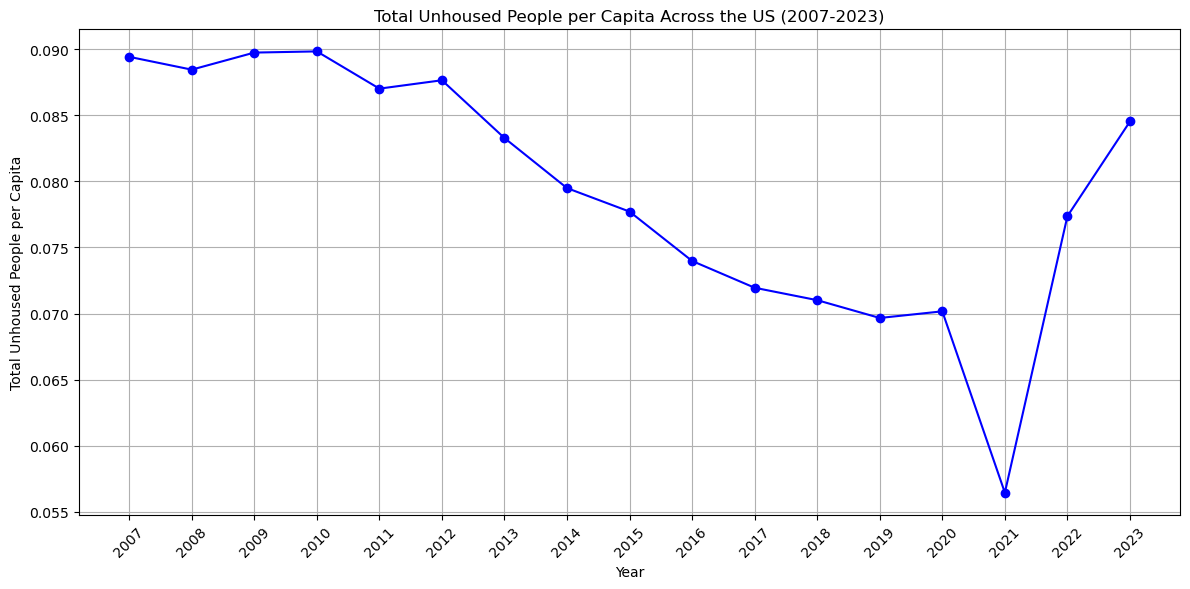

In [107]:
# Create a line graph to visualize the percentage of unhoused people over the years
plt.figure(figsize=(12, 6))
plt.plot(total_unhoused_ratio_per_year['Year'], total_unhoused_ratio_per_year['Total Unhoused People per Capita'], marker='o', linestyle='-', color='b')
plt.title('Total Unhoused People per Capita Across the US (2007-2023)')
plt.xlabel('Year')
plt.ylabel('Total Unhoused People per Capita')
plt.grid(True)
plt.xticks(total_homeless_per_year['Year'], rotation=45)
plt.tight_layout()
plt.show()
